In [9]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("turnover.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df_dummy = pd.get_dummies(df, drop_first=True)

satisfaction_level   -0.476360
time_spend_company    1.853319
dtype: float64
satisfaction_level   -0.094971
time_spend_company    0.397491
dtype: float64


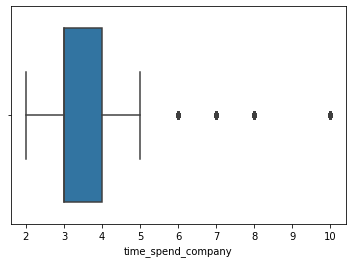

In [13]:
# Adding some preprocessing
print(df_dummy[['satisfaction_level','time_spend_company']].skew())
sns.boxplot(df_dummy.time_spend_company)
df_dummy.loc[df_dummy.time_spend_company>5,'time_spend_company'] = 5
df_dummy['satisfaction_level'] = (df_dummy['satisfaction_level']**1.5)
print(df_dummy[['satisfaction_level','time_spend_company']].skew())

In [14]:
X_train,X_test,y_train,y_test = train_test_split(df_dummy.drop('left',axis=1),df_dummy.left,test_size=0.2,random_state = 1)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2287
           1       0.99      0.97      0.98       713

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [15]:
rf_final = RandomForestClassifier()
rf_final.fit(df_dummy.drop('left',axis=1),df_dummy.left)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
# Downloading the model
filename = 'finalized_model.sav'
pickle.dump(rf_final, open(filename, 'wb'))